# Conjunto de Burning Ship

O Burning Ship é um fractal do plano complexo introduzido por Michael Michelitsch e Otto E. Rössler em 1992. Ele recebe esse nome porque a imagem lembra um “navio em chamas” e é uma variação não-analítica do conjunto de Mandelbrot: a cada iteração, tomam-se os módulos das partes real e imaginária antes de elevar ao quadrado. 

Esse conjunto é definido como o conjunto de pontos para os quais a sequência abaixo permanece limitada:

$z_0 = 0 \newline$
$z_{n+1} = (|Re(z_n)| + i|Im(z_n)|)^2 + c$

In [27]:
from utils import ComplexNumber

i = ComplexNumber(0, 1)
def burning_ship_recurrence(z_n: ComplexNumber, c: ComplexNumber) -> ComplexNumber:
    return ComplexNumber(abs(z_n.x), abs(z_n.y))**2 + c

# Teste de divergência:

É exatamente o mesmo de Mandelbrot.

In [28]:
import numpy as np

iterations = 800
escape_radius = 2
z_0 = ComplexNumber(0, 0)

def test_c(z_0, c, iterations=800, escape_radius=2):
    try:
        z = z_0
        for _ in range(iterations-1):
            z = burning_ship_recurrence(z, c)
            if z.mod > escape_radius:
                return False
    except OverflowError:
        return False
    return True

# Encontrando números do conjunto:

In [29]:
burning_ship_set = np.empty((0, 2))
width, height = (500, 500)

X = np.linspace(-2, 1, num=width)
Y = np.linspace(-1, 1, num=height)

points = []

for x in X:
    for y in Y:
        c = ComplexNumber(x, y)
        if test_c(z_0, c, iterations, escape_radius):
            points.append([x, y])
 
burning_ship_set = np.array(points)

print(len(burning_ship_set))

67154


# Plotando conjunto no Plano de Argand-Gauss:

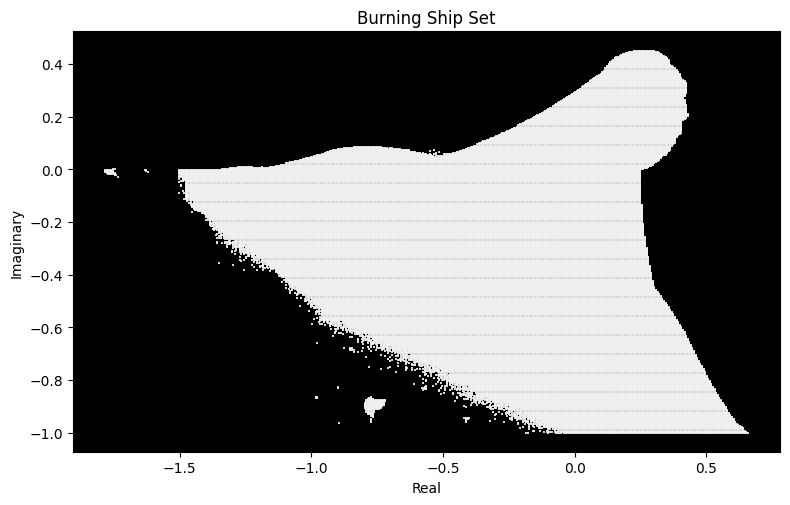

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor("black")

ax.scatter(
    x, y,
    s=1.2,
    c="#f1f1f1",
    marker="s",
    linewidths=0,
    alpha=0.9,
    rasterized=True
)

ax.set_aspect("equal", adjustable="box")

ax.set_xlabel("Real")
ax.set_ylabel("Imaginary")
ax.set_title("Burning Ship Set")

plt.tight_layout()
plt.show()
